# COMPETITION GROUP 2 BATCH 2

#### GROUP MEMBERS: ABOOBACKER SIDHEEQUE MUKKIL, AJEESH L J, DARSANA BABURAJ, MAYA MOHAN, RASAL V


#### The aim of the competition is to create an ML model that helps advertisors to find expected engagement  for  the right category of YouTube videos with certain views.                                       

## 1. Data Collection                                                                                    
Source of dataset: https://www.kaggle.com/datasnaek/youtube-new/version/115?select=INvideos.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:/Data Analytics/Case study/competition/INvideos.csv')

In [3]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [4]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
data.shape

(37352, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [7]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


# 2. Preprocessing

### 2.1 Handling missing values

In [8]:
data.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [9]:
# Dropping description column since it contains multiple null values

In [10]:
data.drop(['description'],axis=1,inplace=True)

In [11]:
data.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [12]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

### 2.2 Feature Reduction

In [13]:
data.nunique()

video_id                  16307
trending_date               205
title                     16721
channel_title              1426
category_id                  17
publish_time              16339
tags                      12578
views                     32136
likes                     15529
dislikes                   5079
comment_count              6027
thumbnail_link            16523
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
dtype: int64

#### 2.2.1 Feature reducing columns that seems irrelevent

In [14]:
data.drop(['video_id','channel_title', 'trending_date','publish_time', 'tags','thumbnail_link'],axis=1,inplace=True)

In [15]:
data.head()

,title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,33966,798,882,False,False,False
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",25,590101,735,904,0,True,False,False
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,2011,243,149,False,False,False
3,Eruma Saani | Tamil vs English,23,1242680,70353,1624,2684,False,False,False
4,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,492,293,66,False,False,False


#### 2.2.2 Checking the nunber of rows in which comments are disabled

In [16]:
data[data['comments_disabled']==True]

,title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",25,590101,735,904,0,True,False,False
12,Renu Desai Gives Rating For Pawan kalyan As Hu...,25,156085,716,53,0,True,False,False
36,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,26,128851,0,0,0,True,True,False
70,"Mission IAS 2018 : 13 November, 2017 The Hindu...",27,23114,0,0,0,True,True,False
82,హిజ్రాల నుంచి ఈ వస్తువు తీసుకుంటే మీ జీవితం మా...,22,65054,349,28,0,True,False,False
...,...,...,...,...,...,...,...,...,...
35997,Nani Opens Up about Big Boss Show | NTR | Bigg...,24,140258,451,529,0,True,False,False
36068,New South Indian Full Hindi Dubbed Movie - Dil...,1,1257942,3615,823,0,True,False,False
36213,Things SIKH people are tired of hearing - Neve...,24,58774,0,0,0,True,True,False
36598,ఏసీల్లో కూర్చొని ఎవరైనా మాట్లాడుతారు..,25,95939,0,0,0,True,True,False


#### 2.2.3 Dropping the rows without comment count

In [17]:
data = data.loc[data['comments_disabled'] != True]

In [18]:
data.shape

(36148, 9)

In [19]:
data.head()

,title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,33966,798,882,False,False,False
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,2011,243,149,False,False,False
3,Eruma Saani | Tamil vs English,23,1242680,70353,1624,2684,False,False,False
4,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,492,293,66,False,False,False
5,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",24,6106669,98612,4185,4763,False,False,False


#### 2.2.4 Dropping the feature comments_disabled

In [20]:
data.drop(['comments_disabled'],axis=1,inplace=True)

In [21]:
data

,title,category_id,views,likes,dislikes,comment_count,ratings_disabled,video_error_or_removed
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,33966,798,882,False,False
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,2011,243,149,False,False
3,Eruma Saani | Tamil vs English,23,1242680,70353,1624,2684,False,False
4,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,492,293,66,False,False
5,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",24,6106669,98612,4185,4763,False,False
...,...,...,...,...,...,...,...,...
37347,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,23,214378,3291,404,196,False,False
37348,Seetha | Flowers | Ep# 364,24,406828,1726,478,1428,False,False
37349,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,24,386319,1216,453,697,False,False
37350,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,24,130263,698,115,65,False,False


#### 2.2.5 Dropping the rating disabled rows

In [22]:
data = data.loc[data['ratings_disabled'] == False]

In [23]:
data.shape

(35727, 8)

#### 2.2.6 Dropping the feature ratings_disabled

In [24]:
data=data.drop(['ratings_disabled'],axis=1)

In [25]:
data

,title,category_id,views,likes,dislikes,comment_count,video_error_or_removed
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,33966,798,882,False
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,2011,243,149,False
3,Eruma Saani | Tamil vs English,23,1242680,70353,1624,2684,False
4,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,492,293,66,False
5,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",24,6106669,98612,4185,4763,False
...,...,...,...,...,...,...,...
37347,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,23,214378,3291,404,196,False
37348,Seetha | Flowers | Ep# 364,24,406828,1726,478,1428,False
37349,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,24,386319,1216,453,697,False
37350,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,24,130263,698,115,65,False


#### Removing duplicate rows

In [26]:
data = data[(data.duplicated(subset = None,keep = 'last'))==False]

In [27]:
data.shape

(31606, 7)

### 2.3 Encoding

In [28]:
# Onehot Encoding

In [29]:
data= data.replace([True,False],['yes','no'])
data=pd.get_dummies(data,columns=['video_error_or_removed'])

In [30]:
data

,title,category_id,views,likes,dislikes,comment_count,video_error_or_removed_no,video_error_or_removed_yes
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,33966,798,882,1,0
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,2011,243,149,1,0
3,Eruma Saani | Tamil vs English,23,1242680,70353,1624,2684,1,0
4,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,492,293,66,1,0
5,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",24,6106669,98612,4185,4763,1,0
...,...,...,...,...,...,...,...,...
37347,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,23,214378,3291,404,196,1,0
37348,Seetha | Flowers | Ep# 364,24,406828,1726,478,1428,1,0
37349,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,24,386319,1216,453,697,1,0
37350,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,24,130263,698,115,65,1,0


### 2.4 Feature Engineering

Creating a new feature 'engagement' that would serve as the target feature for our model. 'engagement' is the total of likes, dislikes and comments in a video

In [31]:
data['engagement']=data['likes']+data[ 'dislikes']+data['comment_count']

In [32]:
data

,title,category_id,views,likes,dislikes,comment_count,video_error_or_removed_no,video_error_or_removed_yes,engagement
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,33966,798,882,1,0,35646
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,2011,243,149,1,0,2403
3,Eruma Saani | Tamil vs English,23,1242680,70353,1624,2684,1,0,74661
4,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,492,293,66,1,0,851
5,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",24,6106669,98612,4185,4763,1,0,107560
...,...,...,...,...,...,...,...,...,...
37347,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,23,214378,3291,404,196,1,0,3891
37348,Seetha | Flowers | Ep# 364,24,406828,1726,478,1428,1,0,3632
37349,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,24,386319,1216,453,697,1,0,2366
37350,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,24,130263,698,115,65,1,0,878


## 3. Exploratory Data Analysis

### 3.1 Bivariate analysis

In [33]:
#Plotting 'views' vs 'engagement'

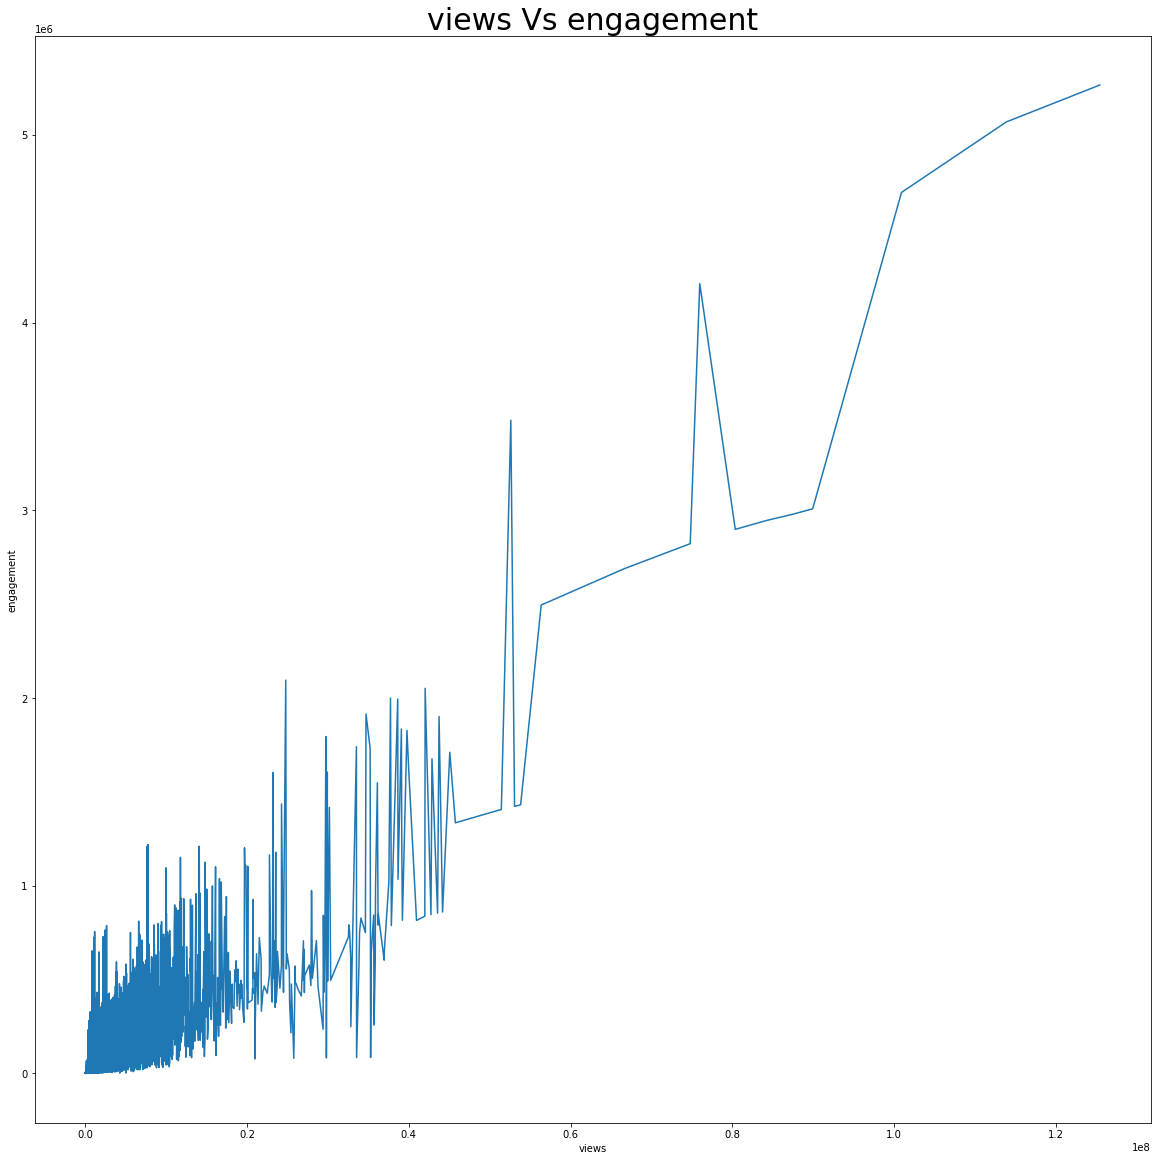

In [34]:
plt.figure(figsize=(20,20))
sns.lineplot(data=data, x='views', y='engagement')
plt.title('views Vs engagement',size=30)
plt.show()

#### Generally engagement increases with views. But spikes can be seen depending on category.

### 3.2 Univariate Analysis

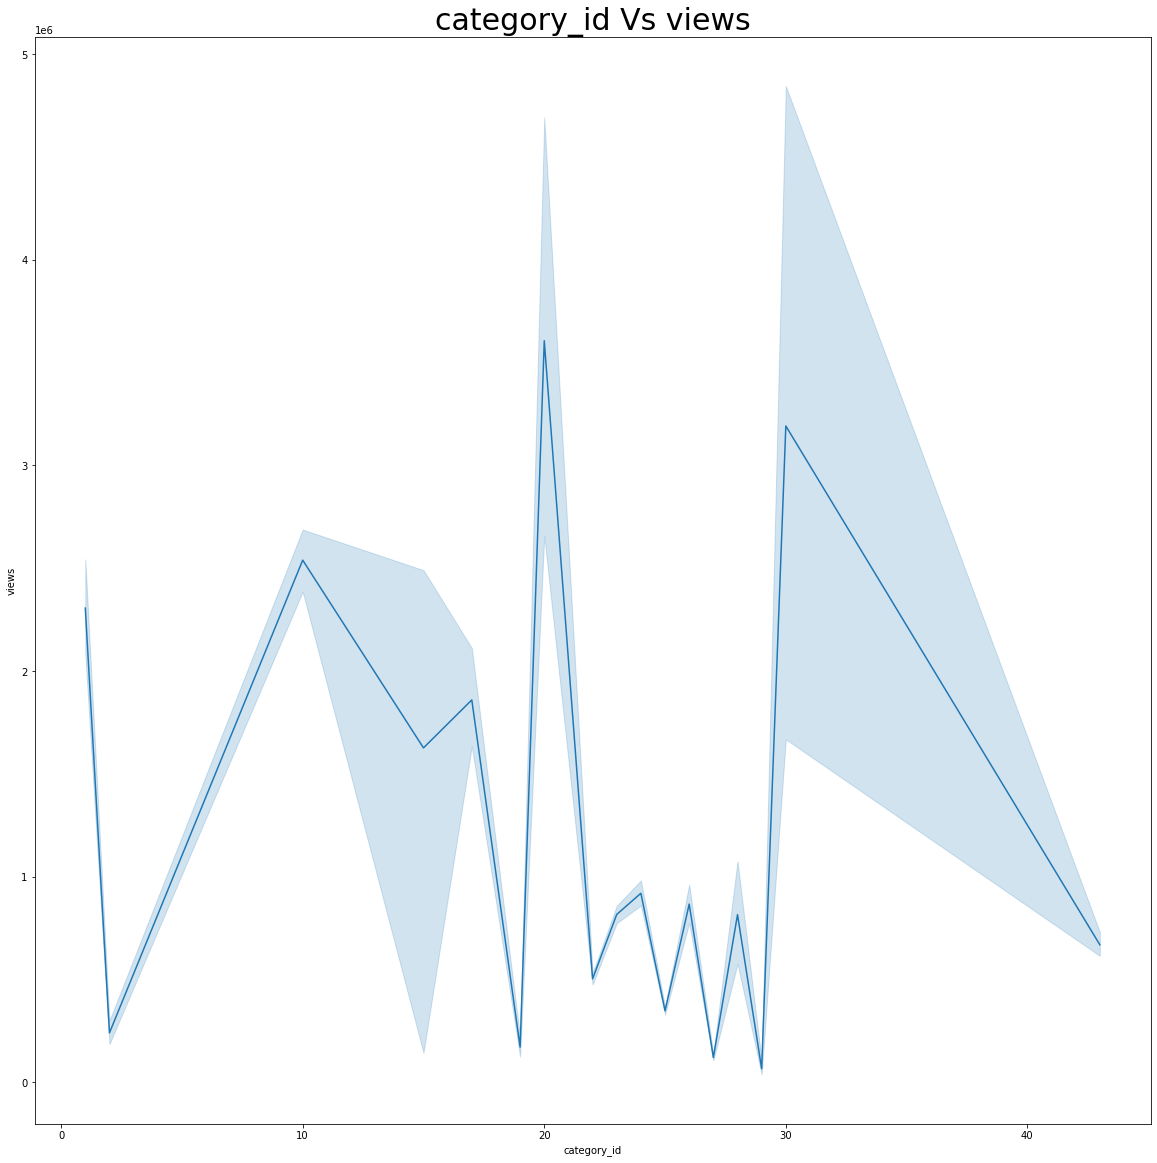

In [35]:
plt.figure(figsize=(20,20))
sns.lineplot(data=data, x='category_id', y='views')
plt.title('category_id Vs views',size=30)
plt.show()

#### It is clear that certain categories attract more views than other

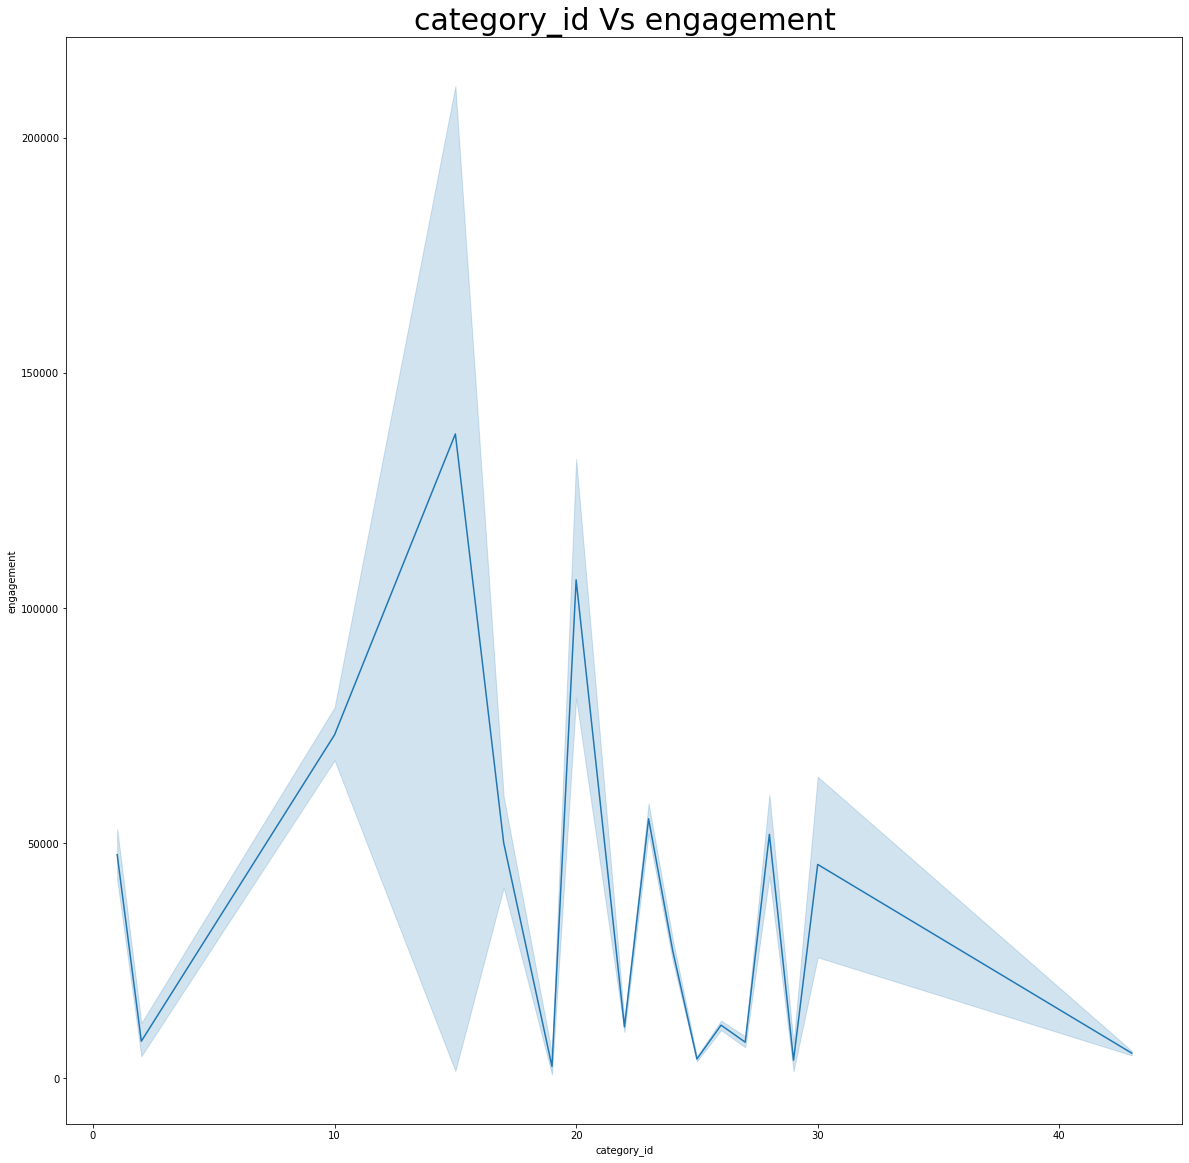

In [36]:
plt.figure(figsize=(20,20))
sns.lineplot(data=data, x='category_id', y='engagement')
plt.title('category_id Vs engagement',size=30)
plt.show()

#### It is clear that certain categories attract more engagement than other

## 4. Modelling

In [37]:
x=data[['category_id','views','video_error_or_removed_yes','video_error_or_removed_no']]
y = data['engagement']

### Standardization

In [38]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)


In [39]:
x.head()

,0,1,2,3
0,-3.154766,0.022396,-0.016877,0.016877
1,0.374732,-0.171179,-0.016877,0.016877
2,0.221275,0.067919,-0.016877,0.016877
3,0.374732,-0.174281,-0.016877,0.016877
4,0.374732,1.580838,-0.016877,0.016877


### 4.1 Linear Regression Model

In [40]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_squared_error

print("MSE is : ",mean_squared_error(ytest,predictions))

from sklearn.metrics import r2_score

print("R squared value is : ",r2_score(ytest,predictions))


          

MSE is :  4291919761.044155
R squared value is :  0.7863194395377224


### 4.2 Random Forest Regression model

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypredictions=rf.predict(xtest)
print("MSE is : ",mean_squared_error(ytest,ypredictions))



print("R squared value is : ",r2_score(ytest,ypredictions))

MSE is :  3841498808.3153214
R squared value is :  0.8087444164668427


### 4.3 SVM model

In [42]:
from sklearn.svm import SVR
svm_linear=SVR(kernel='rbf')
svm_linear.fit(xtrain,ytrain)
ypredictions=svm_linear.predict(xtest)


print("MSE is : ",mean_squared_error(ytest,ypredictions))



print("R squared value is : ",r2_score(ytest,ypredictions))


MSE is :  20796156301.479317
R squared value is :  -0.03537218339798032


### 4.4 kNN model

In [43]:
from sklearn.neighbors import KNeighborsRegressor
mse_val = []
r=[]
for K in range(3,15):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(xtrain, ytrain)  
    pred=model.predict(xtest) 
    error = (mean_squared_error(ytest,pred)) 
    r2=r2_score(ytest,pred)
    mse_val.append(error)
    r.append(r2)
    
    print('MSE value for k= ' , K , 'is:',error)
    print('R2  k= ' , K , 'is:', r2)

MSE value for k=  3 is: 4090846758.658477
R2  k=  3 is: 0.7963302026078019
MSE value for k=  4 is: 3960097432.626908
R2  k=  4 is: 0.8028397812630407
MSE value for k=  5 is: 3759931666.8352923
R2  k=  5 is: 0.8128053760087606
MSE value for k=  6 is: 3867938880.306492
R2  k=  6 is: 0.8074280522950293
MSE value for k=  7 is: 3935483986.9485183
R2  k=  7 is: 0.8040652037220539
MSE value for k=  8 is: 4160679169.1604195
R2  k=  8 is: 0.7928534767030154
MSE value for k=  9 is: 4400621539.847856
R2  k=  9 is: 0.7809075357018571
MSE value for k=  10 is: 4420824049.098426
R2  k=  10 is: 0.7799017192514685
MSE value for k=  11 is: 4637249557.365905
R2  k=  11 is: 0.7691266054376731
MSE value for k=  12 is: 4785752185.937951
R2  k=  12 is: 0.7617331482739548
MSE value for k=  13 is: 4967389019.495781
R2  k=  13 is: 0.7526900480865952
MSE value for k=  14 is: 5050457273.585206
R2  k=  14 is: 0.7485543530879234


In [44]:
#The best attribute for the model is shown at k=5

In [45]:
Regressor=KNeighborsRegressor(n_neighbors=5,metric='minkowski')
Regressor.fit(xtrain,ytrain)
y_pred=Regressor.predict(xtest)

print("MSE is : ",mean_squared_error(ytest,y_pred))

print("R squared value is : ",r2_score(ytest,y_pred))

MSE is :  3759931666.8352923
R squared value is :  0.8128053760087606


### 4.5 XGBoost

In [46]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)
y_pred=xgb.predict(xtest)

print("MSE is : ",mean_squared_error(ytest,y_pred))


print("R squared value is : ",r2_score(ytest,y_pred))


MSE is :  3630943352.02824
R squared value is :  0.8192272797105088


#### We have arrived at the inference that XGBoost model performs best for our dataset. Hence we will fine tune the same.

## 5. Model Fine Tuning

In [47]:
xgb=XGBRegressor(verbosity=0,max_depth=7,min_child_weight=2,random_state=42,n_estimators=200)
xgb.fit(xtrain,ytrain)
y_pred=xgb.predict(xtest)
print("MSE is : ",mean_squared_error(ytest,y_pred))

print("R squared value is : ",r2_score(ytest,y_pred))

MSE is :  3554920572.985908
R squared value is :  0.8230122036928047


##### Fine tuning improved the performance of the model